## Designing a hypothesis test

In [2]:
## help('insert code')
## can tell user what a function does

# practice slicing
# df[['coulmn_name', 'other_column_name']].head()

# dateframe has brackets
# df.loc[:, ['column_name']]

# panda series has no brackets
# df.loc[:, 'column_name']

# export dataframes to csv/excel file
# df.to_csv(path_or_buf='directory/file_name.csv', index = False)
# df.to_excel(excel_writer='directory/file_name.xsls', index = False)

In [17]:
# import packages necessary for project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [18]:
#import dataset from csv
avocado_info = pd.read_csv("avocado_info.csv")

In [19]:
# avocado info is a sample dataframe in pandas
list(avocado_info.columns.values)

['Growth Duration', 'Fertilizer']

In [ ]:
#TURN this into markdown, change code base to more accurate data representation, 1174 rows x (range from 100 - 350, weigthed in 245 - 285 range)
#null hypothesis - does not state association in variables, merely chance
#ex. In this sample data set, on average, avocado trees that received fertilizer took the same period of time to grow as those that did not recieve fertilizer
#alternative hypothesis - attributes trends observed in data to associations between variables
#ex. The distribution of growth duration of avocado trees that recieved fertilizer is different from that of avocado trees that did not recieve fertilizer.
#ex. Also avocado trees that recieved fertilizer took a shorter period of tmie to gro than thos that did not recieve fertilizer.

In [20]:
#create two subset of data, one with fertilized avocados, and one with not fertilized avocado
fertilized = avocado_info.loc[avocado_info['Fertilizer'] == True]

not_fertilized = avocado_info.loc[avocado_info['Fertilizer'] == False]

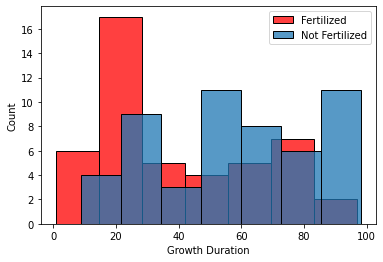

In [25]:
#create overlay histograms
sn.histplot(fertilized['Growth Duration'], kde = False, label = 'Fertilized', color='red')

sn.histplot(not_fertilized['Growth Duration'], kde = False, label = 'Not Fertilized')

#legend as a key for which distribution
plt.legend()

plt.show()

In [ ]:
#Test statistic - use: (avg growing time of trees that recieved fertilizer) minus (avg growing time of trees that did not recieve fertilizer) 
#smaller value mean alternative hypo is more supportive, while larger value indicates null hypo is supported


### Now do a permutation test

In [27]:
# take mean of fertilized growth, and subtract it from non-fertilized growth
## using same fertilized and non_fertilized value
observed_test_stat = np.mean(fertilized['Growth Duration']) - np.mean(not_fertilized['Growth Duration'])

observed_test_stat

-18.443143812709025

In [28]:
avocado_info['Growth Duration'].sample(frac = 1)

20    75
13    85
27    70
79    22
74    24
      ..
60    32
44    55
15    83
58    37
55    45
Name: Growth Duration, Length: 98, dtype: int64

In [29]:
avocado_info['Growth Duration'].sample(frac = 1).reset_index()

,index,Growth Duration
0,31,66
1,88,16
2,52,50
3,60,32
4,16,83
...,...,...
93,43,56
94,77,22
95,45,55
96,32,65


In [31]:
avocado_info['Growth Duration'].sample(frac = 1).reset_index(drop  = True)

0     27
1     16
2     18
3     28
4     91
      ..
93    51
94    98
95    55
96    23
97    83
Name: Growth Duration, Length: 98, dtype: int64

In [32]:
# create permutation function
def perm(data):
    return data.sample(frac = 1).reset_index(drop  = True)

In [34]:
# simulate data over numerous runs
sim_test_stat = np.array([])

reps = 10000

for i in range(reps):
    perm_info = perm(avocado_info['Growth Duration'])

    df = pd.DataFrame({'Permuted Duration': perm_info, 'Fertilizer': avocado_info['Fertilizer']})

    fertilized = df.loc[df['Fertilizer'] == True, 'Permuted Duration']
    not_fertilized = df.loc[df['Fertilizer'] == False, 'Permuted Duration']

    stat = np.mean(fertilized) - np.mean(not_fertilized)

    sim_test_stat = np.append(sim_test_stat, stat)

In [35]:
sim_test_stat

array([-0.90802676,  2.53344482,  4.9916388 , ..., -1.23578595,
        6.91722408, -0.33444816])

In [36]:
p_value = np.count_nonzero(sim_test_stat <= observed_test_stat) / reps

In [37]:
p_value

0.0005

In [ ]:
### use a predetermined p-value cutoff typically 5% ro 1%, if p_value is under p-value cutff, reject the null hypothesis...
### therefore can conclude observed value confirms alternative hypothesis

### Confidence interval

In [38]:
#using fertilized and non_fertilized values from before
np.random.choice(fertilized, size = len(fertilized))

array([26, 11, 45, 20, 28, 50, 98, 17, 21,  7, 70, 20, 55, 50, 35, 26, 17,
       28, 21, 45, 76, 57,  1, 11, 40, 27, 23, 68, 76, 26, 66, 17, 28, 55,
       62, 66, 85, 66, 28, 28, 17, 45, 57, 66, 87, 76], dtype=int64)

In [39]:
np.random.choice(not_fertilized, size = len(not_fertilized))

array([83, 55, 37, 16, 72, 90, 51, 88, 17, 61, 31, 70, 63, 26, 64, 90, 31,
       32,  9, 97, 88, 30, 26, 22, 31, 83, 78, 61, 30, 83, 57, 26, 22, 83,
       51, 14, 80, 56, 57, 32, 57, 70, 47, 97, 51, 22, 37, 64, 57, 16, 65,
       51], dtype=int64)

In [40]:
def resample(orig_sample):
    return np.random.choice(orig_sample, size = len(orig_sample))

In [44]:
def bootstrap(orig_sample, reps):
    means = np.array([])

    for i in range(reps):
        new_sample = resample(orig_sample)

        new_mean = np.mean(new_sample)

        means = np.append(means, new_mean)

    return means

In [45]:
fertilized_means = bootstrap(fertilized, 10000)

not_fertilized_means = bootstrap(not_fertilized, 10000)

estimates = fertilized_means - not_fertilized_means

In [46]:
estimates

array([-2.61036789,  1.17725753, -9.18729097, ...,  6.14381271,
        2.6680602 ,  3.49832776])

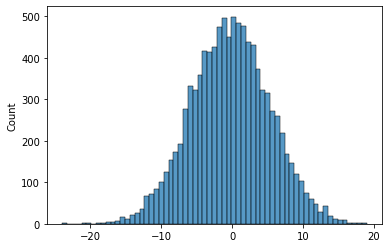

In [47]:
sn.histplot(estimates, kde = False)
plt.show()

In [48]:
#check confidence intervals
(np.percentile(estimates, 2.5), np.percentile(estimates, 97.5))

(-11.165760869565217, 10.61486204013378)